# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

In this project, we will attempt to extract data from Box Office Mojo website to review the list of films that have become box office hits each year. The data source is from the well-known and comprehensive movie rating website, IMDb, and it is publicly available. The data on the website is annual data, and for convenience, we are only taking the default and most recent data available for the year 2024. The list on the website is a ranking from 1 to 200 of the most profitable films in the world, both domestically and internationally.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [2]:
import requests

url_get = requests.get('https://www.boxofficemojo.com/year/world/')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [9]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

After analyzing the structure of the website, we found a div element that contains the table tag displaying the box office film ranking table. Therefore, we can simply use the find function to capture all the HTML elements within the div class="a-section imdb-scroll-table-inner element.

<img src="img_output/screenshot_table.png" width="800" height="400">

In [35]:
#table = soup.find('table', attrs={'class':'a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated scrolling-data-table'})
#table = soup.find('td', attrs={'class':'a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column'})

table = soup.find('div', attrs={'class':'a-section imdb-scroll-table-inner'})

if table:
    print(table.prettify()[1:1000])
else:
    print("Table not found")

div class="a-section imdb-scroll-table-inner">
 <table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated">
  <tr>
   <th class="a-text-right mojo-field-type-rank mojo-sort-column mojo-sortable-column a-nowrap">
    <a class="a-link-normal a-nowrap" href="?sort=rank&amp;ref_=bo_ydw__resort#table" title="Rank">
     <span class="a-color-state">
      Rank
     </span>
     <span class="a-letter-space">
     </span>
     <span class="icon aok-relative">
      <i class="a-icon a-icon-collapse" role="presentation">
      </i>
     </span>
    </a>
   </th>
   <th class="a-text-left mojo-field-type-release_group mojo-sortable-column a-nowrap">
    <span title="Release Group">
     Release Group
    </span>
   </th>
   <th class="a-text-right mojo-field-type-money mojo-sortable-column a-nowrap">
    <a class="a-link-normal a-nowrap" href="?sort=worldwideGrossToDate&amp;ref_=bo_ydw__resort#table" title="Worldwide">
     Worldwide
     <span class


Next, we need to find the row length.

In [51]:
row = table.find_all('td', attrs={'class':'a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column'})
row_length = len(row)

print(row_length)

200


Do the scrapping process here 

At this stage, we divided the process into two looping stages because, after further examination, the <td> table data element that we wanted to extract had the same class name. Therefore, the columns with the same class name were first stored in a helper list to make it easier to call the list when reading the rows.

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [114]:
# Find all the rows in the table
rows = table.find_all('tr')

# Initialize lists to store the column data
worldwide_list = []
domestic_list = []
foreign_list = []
percentage_domestic_list = []
percentage_foreign_list = []

# Loop through each row
for row in rows:
    # Find all columns in the row
    columns_usd = row.find_all('td', class_='a-text-right mojo-field-type-money')
    
    # Make sure there are enough columns in the row
    if len(columns_usd) >= 2:  # Adjust index if more columns exist
        worldwide_list.append(columns_usd[0].text.strip())
        domestic_list.append(columns_usd[1].text.strip())
        foreign_list.append(columns_usd[2].text.strip())

for row in rows:
    # Find all columns in the row
    columns_percentage = row.find_all('td', class_='a-text-right mojo-field-type-percent')
    
    # Make sure there are enough columns in the row
    if len(columns_percentage) >= 2:  # Adjust index if more columns exist
        percentage_domestic_list.append(columns_percentage[0].text.strip())
        percentage_foreign_list.append(columns_percentage[1].text.strip())

# Now worldwide_list and domestic_list contain the respective column data


In the second loop section we try to read the data row by row and insert it into the "temp" list, as a data frame that holds tabular data.

In [204]:
temp = []  # Initiating a tuple

for i in range(0, row_length):
    # Scraping process
    # You can add your scraping code here

    # Extract all 'td' elements with the USD Class
    #usd_elements = table.find_all('td', attrs={'class': 'a-text-right mojo-field-type-money'})
    # Extract all 'td' elements with the USD Class
    #percentage_elements = table.find_all('td', attrs={'class': 'a-text-right mojo-field-type-percent'})

    #get rank
    rank = table.find_all('td', attrs={'class':'a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column'})[i].text

    #get Release Group
    release_group = table.find_all('td', attrs={'class':'a-text-left mojo-field-type-release_group'})[i].text

    #get Worldwide
    #worldwide = usd_elements[1].text.strip()
    worldwide = worldwide_list[i]

    #get Domestic
    #domestic = usd_elements[1].text.strip()
    domestic = domestic_list[i]

    #get Foreign
    #foreign = usd_elements[2].text.strip()
    foreign = foreign_list[i]

    #get percentage_domestic
    #percentage_domestic = percentage_elements[0].text.strip()
    percentage_domestic = percentage_domestic_list[i]

    #get percentage_foreign
    #percentage_foreign = percentage_elements[1].text.strip()
    percentage_foreign = percentage_foreign_list[i]

    temp.append((rank, release_group, worldwide, domestic, percentage_domestic, foreign, percentage_foreign))
    

temp

[('1',
  'Inside Out 2',
  '$1,668,282,414',
  '$650,825,110',
  '39%',
  '$1,017,457,304',
  '61%'),
 ('2',
  'Deadpool & Wolverine',
  '$1,264,712,600',
  '$603,907,246',
  '47.8%',
  '$660,805,354',
  '52.2%'),
 ('3',
  'Despicable Me 4',
  '$915,370,680',
  '$355,536,680',
  '38.8%',
  '$559,834,000',
  '61.2%'),
 ('4',
  'Dune: Part Two',
  '$711,844,358',
  '$282,144,358',
  '39.6%',
  '$429,700,000',
  '60.4%'),
 ('5',
  'Godzilla x Kong: The New Empire',
  '$567,650,016',
  '$196,350,016',
  '34.6%',
  '$371,300,000',
  '65.4%'),
 ('6',
  'Kung Fu Panda 4',
  '$547,960,394',
  '$193,590,620',
  '35.3%',
  '$354,369,774',
  '64.7%'),
 ('7',
  'Bad Boys: Ride or Die',
  '$402,555,575',
  '$193,570,181',
  '48.1%',
  '$208,985,394',
  '51.9%'),
 ('8',
  'Kingdom of the Planet of the Apes',
  '$397,378,150',
  '$171,130,165',
  '43.1%',
  '$226,247,985',
  '56.9%'),
 ('9',
  'Twisters',
  '$361,915,155',
  '$260,715,155',
  '72%',
  '$101,200,000',
  '28%'),
 ('10',
  'Alien: Romul

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [293]:
import pandas as pd

df = pd.DataFrame(temp, columns=('rank', 'release_group', 'worldwide', 'domestic', 'percentage_domestic', 'foreign', 'percentage_foreign'))
df.tail(100)

,rank,release_group,worldwide,domestic,percentage_domestic,foreign,percentage_foreign
100,101,Reagan,"$10,304,141","$10,300,760",100%,"$3,381",<0.1%
101,102,Lisa Frankenstein,"$9,927,714","$9,774,285",98.5%,"$153,429",1.5%
102,103,Thelma,"$9,904,653","$8,844,060",89.3%,"$1,060,593",10.7%
103,104,The Exorcism,"$9,554,079","$4,530,418",47.4%,"$5,023,661",52.6%
104,105,The Chosen: S4 Episodes 4-6,"$9,482,744","$9,482,744",100%,-,-
...,...,...,...,...,...,...,...
195,196,The Price of Money: A Largo Winch Adventure,"$3,352,123",-,-,"$3,352,123",100%
196,197,Boléro,"$3,340,349",-,-,"$3,340,349",100%
197,198,Seventeen Tour 'Follow' Again to Cinemas,"$3,322,969",-,-,"$3,322,969",100%
198,199,La petite vadrouille,"$3,285,001",-,-,"$3,285,001",100%


### Data Cleansing

In the data cleansing section there are several challenges that we must solve, the first is that we must remove the USD format so that the data can be changed into integer data to be calculated. The second is that the data in % format must also be removed and changed to float type so that the numbers behind the comma are still captured and can be calculated further. The third is, change the columns that have the characters "-" and also "<0.1".

In [317]:
# Convert columns to strings
df['worldwide'] = df['worldwide'].astype(str)
df['domestic'] = df['domestic'].astype(str)
df['percentage_domestic'] = df['percentage_domestic'].astype(str)
df['foreign'] = df['foreign'].astype(str)
df['percentage_foreign'] = df['percentage_foreign'].astype(str)

# Replace '-' with '0'
df['domestic'] = df['domestic'].replace('-', '$0')
df['percentage_domestic'] = df['percentage_domestic'].replace('-', '0%')
df['foreign'] = df['foreign'].replace('-', '$0')
df['percentage_foreign'] = df['percentage_foreign'].replace('-', '0%')
df['percentage_foreign'] = df['percentage_foreign'].replace('<', '')

df['rank'] = df['rank'].astype('int')
#df['release_group'] = df['release_group'].astype('float64')
df['worldwide'] = df['worldwide'].str.replace('$', '').replace(',', '', regex=True).astype(int)
df['domestic'] = df['domestic'].str.replace('$', '').replace(',', '', regex=True).astype(int)
df['percentage_domestic'] = df['percentage_domestic'].astype(str).str.replace('%', '').astype(float) / 100
df['foreign'] = df['foreign'].str.replace('$', '').replace(',', '', regex=True).astype(int)
df['percentage_foreign'] = df['percentage_foreign'].astype(str).str.replace(r'[<%]', '', regex=True).astype(float) / 100
#df['percentage_foreign'] = df['percentage_foreign'].astype(str).str.replace('%', '')


df.head(200)


,rank,release_group,worldwide,domestic,percentage_domestic,foreign,percentage_foreign
0,1,Inside Out 2,1668282414,650825110,0.00390,1017457304,0.00610
1,2,Deadpool & Wolverine,1264712600,603907246,0.00478,660805354,0.00522
2,3,Despicable Me 4,915370680,355536680,0.00388,559834000,0.00612
3,4,Dune: Part Two,711844358,282144358,0.00396,429700000,0.00604
4,5,Godzilla x Kong: The New Empire,567650016,196350016,0.00346,371300000,0.00654
5,6,Kung Fu Panda 4,547960394,193590620,0.00353,354369774,0.00647
6,7,Bad Boys: Ride or Die,402555575,193570181,0.00481,208985394,0.00519
7,8,Kingdom of the Planet of the Apes,397378150,171130165,0.00431,226247985,0.00569
8,9,Twisters,361915155,260715155,0.00720,101200000,0.00280
9,10,Alien: Romulus,288522766,91094755,0.00316,197428011,0.00684


### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)

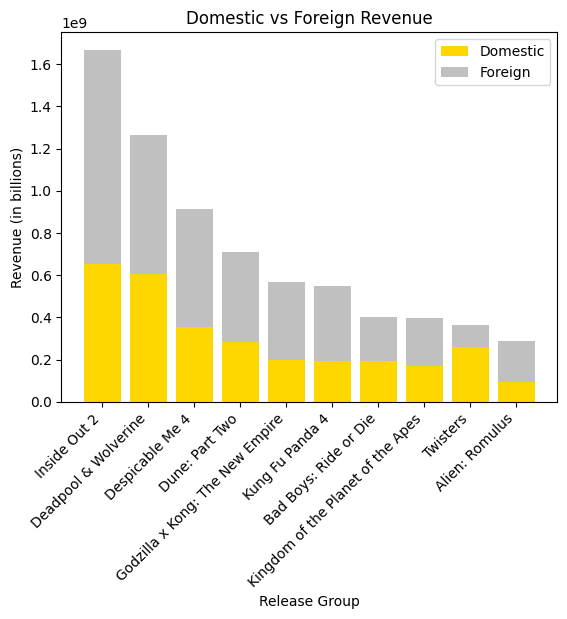

In [314]:
import matplotlib.pyplot as plt

# Sample data (assumed to be in the DataFrame `df`)
df_graph1 = df.head(10)

# Plotting
fig, ax = plt.subplots()

# Create the stacked bar plot
ax.bar(df['release_group'], df_graph1['domestic'], label='Domestic', color='gold')
ax.bar(df['release_group'], df_graph1['foreign'], bottom=df['domestic'], label='Foreign', color='silver')

# Adding labels and title
ax.set_xlabel('Release Group')
ax.set_ylabel('Revenue (in billions)')
ax.set_title('Domestic vs Foreign Revenue')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


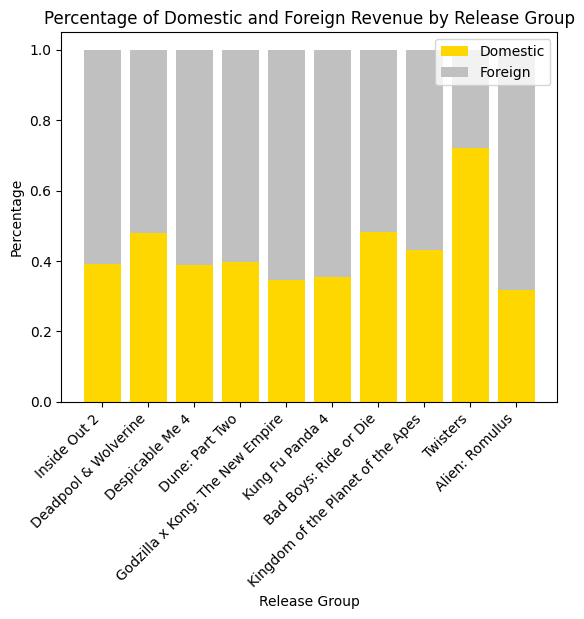

In [315]:
import matplotlib.pyplot as plt

# Sample data (assumed to be in the DataFrame `df`)
# df = ...

# Plotting
fig, ax = plt.subplots()

# Create the stacked bar plot
ax.bar(df['release_group'], df['percentage_domestic'], label='Domestic', color = 'gold')
ax.bar(df['release_group'], df['percentage_foreign'], bottom=df['percentage_domestic'], label='Foreign', color = 'silver')

# Adding labels and title
ax.set_xlabel('Release Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Domestic and Foreign Revenue by Release Group')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

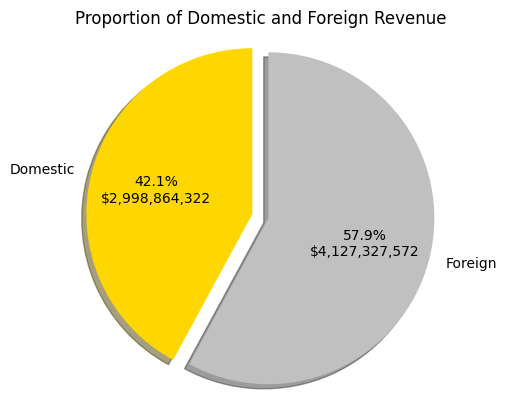

In [318]:
import matplotlib.pyplot as plt

# Sum the values in the 'domestic' and 'foreign' columns
domestic_sum = df['domestic'].sum()
foreign_sum = df['foreign'].sum()

import matplotlib.pyplot as plt

# Function to format both percentage and actual value
def autopct_format(pct, all_values):
    absolute_value = int(pct/100.*sum(all_values))
    return f"{pct:.1f}%\n${absolute_value:,.0f}"

# Sum the values in the 'domestic' and 'foreign' columns
domestic_sum = df['domestic'].sum()
foreign_sum = df['foreign'].sum()

# Data for the pie chart
labels = ['Domestic', 'Foreign']
sizes = [domestic_sum, foreign_sum]
colors = ['gold', 'silver']  # Optional: colors for the pie chart
explode = (0.1, 0)  # Optional: "explode" the first slice

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the chart
plt.title("Proportion of Domestic and Foreign Revenue")
plt.show()




## Analysis

Analysis of the Data:
1. The highest revenue was achieved by the movie "Inside Out 2," which earned over $1.6 million USD.
2. The largest portion of the top 10 films' revenue came from foreign earnings.
3. The film "Twisters" is unique in that its highest revenue came from domestic sources, which is atypical compared to other films' revenue patterns.
4. Although in the top 10 it seems that the domestic revenue is not too large (<30%), but after totaling the overall box office revenue, domestic contributed 42.1% of the total revenue.

Technical Conclusions:
1. In this project, I extracted data from IMDB, and the difficulty lay in dealing with HTML class names that were the same across several columns (<td> tags) for worldwide, foreign, and domestic revenue. Additionally, there were two columns for percentages—domestic and foreign.
2. Extra effort was needed to extract this data by performing two loops: the first loop extracted the data from columns with the same class name, and the second mapped the extracted data to each row.
3. Another challenge was data wrangling and cleansing. There were '-' characters in empty columns that needed to be replaced with '0' to avoid errors when converting to integer or float data types.
4. A particularly unique issue was the presence of "<0.1" in the foreign percentage column, which impeded the process of changing data types due to the inconsistent format.
5. After the data was cleaned and organized, the project proceeded without further issues.
6. The drawback of this web crawling is that if there is a design update on the website that causes changes in the HTML elements or the URL, we need to adjust the Python code we have already created.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.